# CHURN PREDICTION 

#### ABSTRACT:
Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

#### DATA DESCRIPTION:
The dataset contains totally 21 columns and 5621 rows.

The column descriptions are:

__customerID__ - ID of the customer

__Partner__ -whether the customer has Partner or not.

__Dependents__ - whether the customer has Dependents or not.

__tenure__ - the customer tenure with the telecom company.

__PaymentMethod__ - four different types of payment methods. 

__Contract__ - three different contracts between customers and company.

__TotalCharges,MonthlyCharges__ - The monthly and total charges based on tenure.

__MultipleLines,InternetService,
       OnlineSecurity,OnlineBackup, <br>
       DeviceProtection,TechSupport,PhoneService__ - whether customer has phone service ,internet service , multiple lines in internet service , online security ,device protection and tech support.The labels are yes, no and no internet service.
       
There are few other features which are clearly understandable.

The test data contains 1369 rows and the churn is to be predicted.
#### INSIGHTS FROM THE DATA:
 
1.The main important insight drawn from the data is that it is higly imbalanced.

2.There are equal number of female and male customers.

3.The data says that the 84% of customers are youth and remaining are senior citizens.

4.There are equal number of customers who have and doesn't have partnership.

5.Arond 95% of customers have phone service.
 
6.Most of the customers took month-to-month contract with the telecom company.

7.Most of the Internet Service providers are Fibre Optic.

8.Most of the customers used Paperless billing.

9.The Payment method for most of the customers is Electronic check and less for credit card transfers.

10.The customers without internet service not at all churned.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(0)

In [2]:
df=pd.read_csv("/root/Documents/DATASETS/churntr.csv")
#df=pd.read_csv("churntr.csv")
print(df.shape)
print(len(df))
df.columns

(5674, 21)
5674


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

No     4184
Yes    1490
Name: Churn, dtype: int64

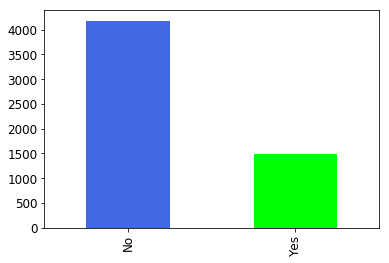

In [3]:
c=[ 'royalblue' ,'lime']
img=df.Churn.value_counts().plot(kind="bar",color=c)
df.Churn.value_counts()

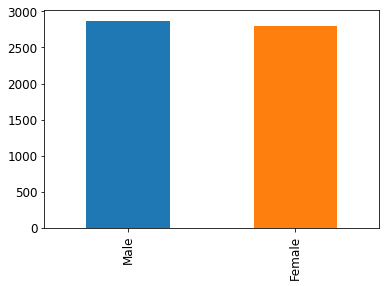

In [4]:
df.gender.value_counts().plot(kind="bar")

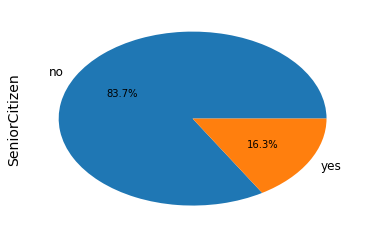

In [5]:
df.SeniorCitizen.value_counts().plot(kind="pie",autopct='%.1f%%',labels=["no","yes"])

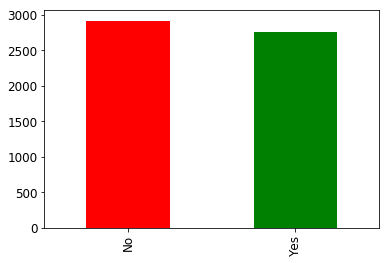

In [6]:
df.Partner.value_counts().plot(kind="bar",color=["red","green"])

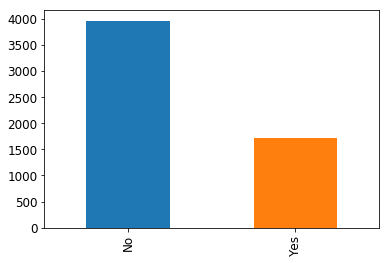

In [7]:
df.Dependents.value_counts().plot(kind="bar")

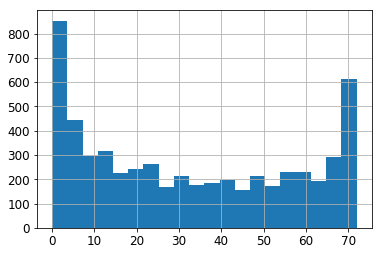

In [8]:
df.tenure.hist(bins=20)

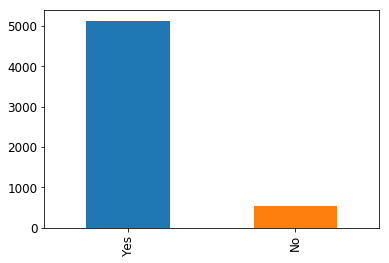

In [9]:
df.PhoneService.value_counts().plot(kind="bar")

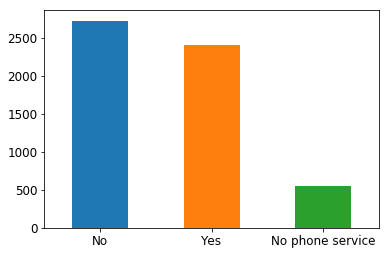

In [10]:
df.MultipleLines.value_counts().plot(kind="bar",rot=0.1)

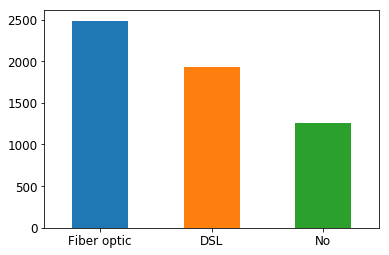

In [11]:
df.InternetService.value_counts().plot(kind="bar",rot=0.1)

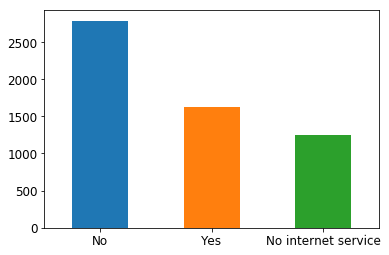

In [12]:
df.OnlineSecurity.value_counts().plot(kind="bar",rot=0.1)

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

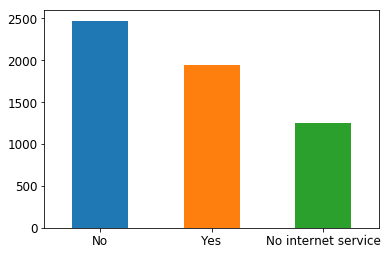

In [14]:
df.OnlineBackup.value_counts().plot(kind="bar",rot=0.1)

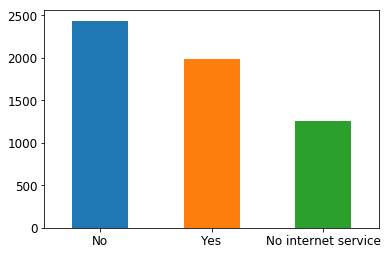

In [15]:
df.DeviceProtection.value_counts().plot(kind="bar",rot=0)

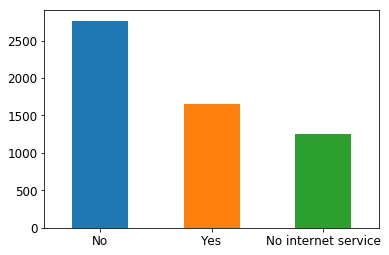

In [16]:
df.TechSupport.value_counts().plot(kind="bar",rot=0)

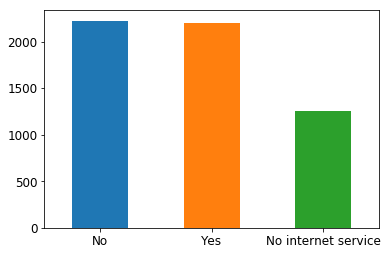

In [17]:
df.StreamingMovies.value_counts().plot(kind="bar",rot=0)

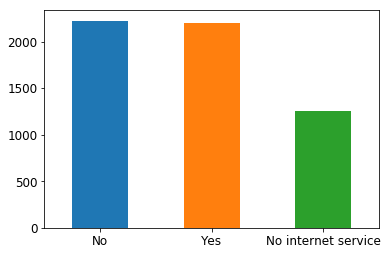

In [18]:
df.StreamingTV.value_counts().plot(kind="bar",rot=0)

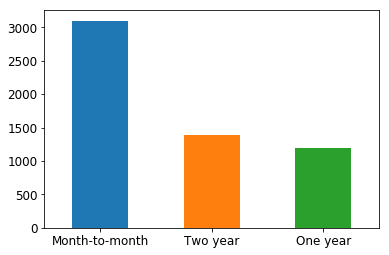

In [19]:
df.Contract.value_counts().plot(kind="bar",rot=0)

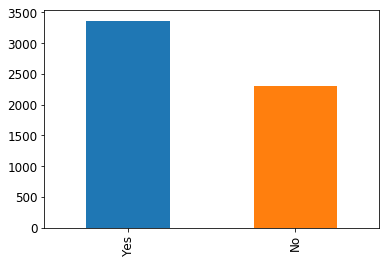

In [20]:
df.PaperlessBilling.value_counts().plot(kind="bar")

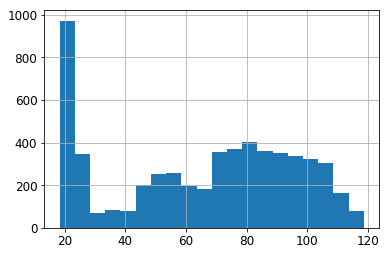

In [21]:
df.MonthlyCharges.hist(bins=20)

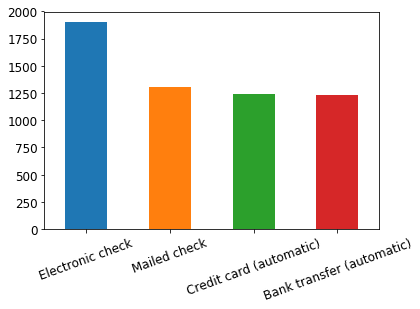

In [22]:
df.PaymentMethod.value_counts().plot(kind="bar",rot=20)

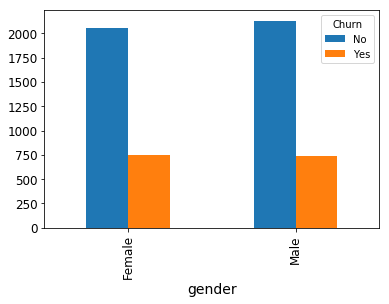

In [23]:
pd.crosstab(df.gender,df.Churn).plot(kind="bar")

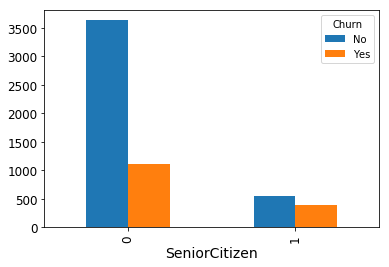

In [24]:
pd.crosstab(df.SeniorCitizen,df.Churn).plot(kind="bar")

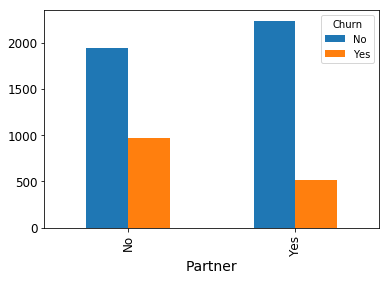

In [25]:
pd.crosstab(df.Partner,df.Churn).plot(kind="bar")

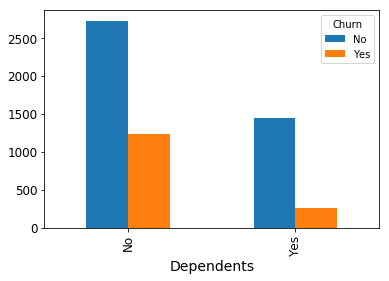

In [26]:
pd.crosstab(df.Dependents,df.Churn).plot(kind="bar")

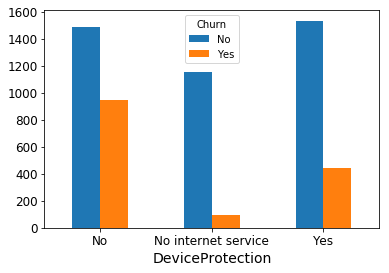

In [27]:
pd.crosstab(df.DeviceProtection,df.Churn).plot(kind="bar",rot=0)

In [28]:
def encchurn(dff):
    dff.loc[dff.Churn=="Yes","Churn"]=1
    dff.loc[dff.Churn=="No","Churn"]=0
    return dff
df=encchurn(df)

In [29]:
np.corrcoef(df.Churn,df.tenure)

array([[ 1.        , -0.35032048],
       [-0.35032048,  1.        ]])

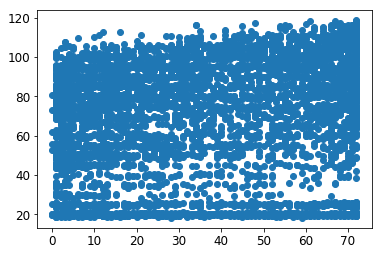

In [30]:
plt.scatter(df.tenure,df.MonthlyCharges)

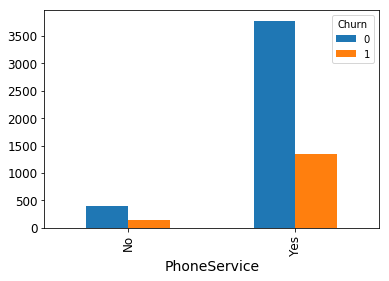

In [31]:
pd.crosstab(df.PhoneService,df.Churn).plot(kind="bar")

In [32]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.022334,0.223584,0.149728
tenure,0.022334,1.000000,0.253934,-0.350320
MonthlyCharges,0.223584,0.253934,1.000000,0.191444
Churn,0.149728,-0.350320,0.191444,1.000000


In [33]:
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
def changeall(dff):
    conf=["tenure","TotalCharges","MonthlyCharges","customerID","Churn"]
    cond=[co for co in dff.columns if co not in conf]
    for it in cond:
        le=LabelEncoder()
        dff[it]=le.fit_transform(dff[it])
    mms=MinMaxScaler()
    x=list(dff.TotalCharges)
    for i in range(len(x)):
        if x[i]!=" ":
            x[i]=float(x[i])
        else:
            x[i]=0
    for i in range(len(x)):
        if x[i]==0:
            x[i]=sum(x)/len(x)
    dff.TotalCharges=x
    mms=MinMaxScaler()
    dff.loc[:,["MonthlyCharges","TotalCharges","tenure"]]=mms.fit_transform(dff.loc[:,["MonthlyCharges","TotalCharges","tenure"]])
    return dff
def onehot(dff):
    onehcol=["PaymentMethod","Contract","InternetService"]
    for co in onehcol:
        oneh=OneHotEncoder()
        xx=oneh.fit_transform(np.array(dff[co]).reshape(-1,1)).toarray()
        dffOneHot = pd.DataFrame(xx, columns = [co+str(int(i)) for i in range(xx.shape[1])])
        dff = pd.concat([dff, dffOneHot], axis=1)
    dff.drop(onehcol,inplace=True,axis=1)
    return dff
df=changeall(df)
df.drop_duplicates(inplace=True)
df.drop(["Partner","PhoneService","MultipleLines"],axis=1,inplace=True)
df.corr()

,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.002261,0.016641,0.013817,-0.002468,-0.003325,-0.007291,-0.001048,0.005549,-0.008518,-0.016505,0.008779,-0.013173,0.009982,-0.014999,0.004267,-0.010777
SeniorCitizen,-0.002261,1.000000,-0.210709,0.022334,-0.026430,-0.129367,-0.017984,-0.023243,-0.155146,0.024541,0.051567,-0.134899,0.154685,-0.044177,0.223584,0.106646,0.149728
Dependents,0.016641,-0.210709,1.000000,0.159667,0.043680,0.155960,0.098787,0.082178,0.135517,0.048366,0.015290,0.248147,-0.110918,-0.043572,-0.118175,0.062275,-0.168299
tenure,0.013817,0.022334,0.159667,1.000000,-0.037247,0.325911,0.367085,0.367325,0.315012,0.287119,0.302417,0.673140,0.005621,-0.379924,0.253934,0.824986,-0.350320
InternetService,-0.002468,-0.026430,0.043680,-0.037247,1.000000,-0.017225,0.043084,0.039945,-0.026390,0.100067,0.096288,0.097099,-0.153257,0.091763,-0.331176,-0.181018,-0.048816
OnlineSecurity,-0.003325,-0.129367,0.155960,0.325911,-0.017225,1.000000,0.187257,0.173633,0.276822,0.038948,0.051973,0.375627,-0.161623,-0.109068,-0.046513,0.260187,-0.289527
OnlineBackup,-0.007291,-0.017984,0.098787,0.367085,0.043084,0.187257,1.000000,0.186087,0.190768,0.157969,0.150690,0.279174,-0.017316,-0.130003,0.127251,0.372687,-0.190995
DeviceProtection,-0.001048,-0.023243,0.082178,0.367325,0.039945,0.173633,0.186087,1.000000,0.234778,0.280475,0.295012,0.345796,-0.044520,-0.145542,0.171689,0.389993,-0.173823
TechSupport,0.005549,-0.155146,0.135517,0.315012,-0.026390,0.276822,0.190768,0.234778,1.000000,0.154893,0.150254,0.417904,-0.115847,-0.104622,-0.009310,0.271952,-0.276051
StreamingTV,-0.008518,0.024541,0.048366,0.287119,0.100067,0.038948,0.157969,0.280475,0.154893,1.000000,0.425453,0.222862,0.094712,-0.104008,0.335929,0.390019,-0.034443


In [34]:
df=onehot(df)

In [35]:
from sklearn.ensemble import *
#df.drop(["PhoneService","gender"],axis=1,inplace=True)
df.drop(["gender"],axis=1,inplace=True)
X=df.drop(["Churn","customerID"],axis=1)
y=df.Churn
from sklearn.metrics import *
from sklearn.model_selection import *
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.25)

In [36]:
#DUMMMY MODEL
clfsm=SVC()
clfsm.fit(Xtr,ytr)
pred=clfsm.predict(Xte)
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))
print("*"*120)
clfsm=LogisticRegression()
clfsm.fit(Xtr,ytr)
pred=clfsm.predict(Xte)
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))
confusion_matrix(pred,yte)


CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1165
           1       0.46      0.67      0.54       254

   micro avg       0.80      0.80      0.80      1419
   macro avg       0.69      0.75      0.71      1419
weighted avg       0.84      0.80      0.81      1419

ACCURACY SCORE 0.797744890768
************************************************************************************************************************

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1125
           1       0.51      0.64      0.57       294

   micro avg       0.80      0.80      0.80      1419
   macro avg       0.70      0.74      0.72      1419
weighted avg       0.82      0.80      0.81      1419

ACCURACY SCORE 0.797744890768


array([[943, 182],
       [105, 189]])

CONFUSION MATRIX
 [[906 144]
 [142 227]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1050
           1       0.61      0.62      0.61       369

   micro avg       0.80      0.80      0.80      1419
   macro avg       0.74      0.74      0.74      1419
weighted avg       0.80      0.80      0.80      1419

ACCURACY SCORE 0.798449612403


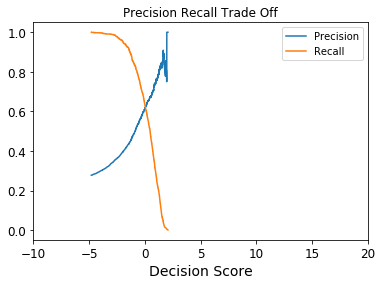

In [37]:
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
sm=SMOTE(sampling_strategy=0.5)
Xtrm,ytrm=sm.fit_sample(Xtr,ytr)
clfsm=LogisticRegression()
#clfsm=AdaBoostClassifier(base_estimator=rfc,n_estimators=500,learning_rate=0.001)
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION MATRIX\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))
y_pred_decision = clfsm.decision_function(Xtr)
precisions, recalls, thresholds = precision_recall_curve(ytr,y_pred_decision)
#Precision-Recall Trade-off
plt.plot(thresholds,precisions[:-1],label='Precision')
plt.plot(thresholds,recalls[:-1],label='Recall')
plt.xlabel("Decision Score")
plt.title('Precision Recall Trade Off')
plt.legend()
plt.xlim([-10,20])
plt.show()

CONFUSION MATRIX
 [[1017  291]
 [  31   80]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.97      0.78      0.86      1308
           1       0.22      0.72      0.33       111

   micro avg       0.77      0.77      0.77      1419
   macro avg       0.59      0.75      0.60      1419
weighted avg       0.91      0.77      0.82      1419

ACCURACY SCORE 0.773079633545


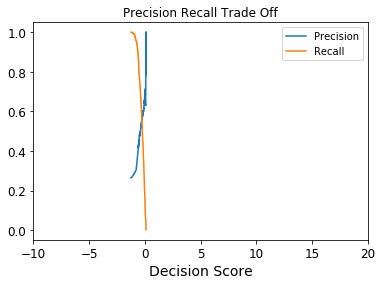

In [38]:
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
sm=SMOTE(sampling_strategy=0.5)
Xtrm,ytrm=sm.fit_sample(Xtr,ytr)
rfc=LogisticRegression()
clfsm=AdaBoostClassifier(base_estimator=rfc,learning_rate=0.001)
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION MATRIX\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))
y_pred_decision = clfsm.decision_function(Xtr)
precisions, recalls, thresholds = precision_recall_curve(ytr,y_pred_decision)
#Precision-Recall Trade-off
plt.plot(thresholds,precisions[:-1],label='Precision')
plt.plot(thresholds,recalls[:-1],label='Recall')
plt.xlabel("Decision Score")
plt.title('Precision Recall Trade Off')
plt.legend()
plt.xlim([-10,20])
plt.show()

In [39]:
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
sm=SMOTE(sampling_strategy=0.5)
Xtrm,ytrm=sm.fit_sample(Xtr,ytr)
rfc=DecisionTreeClassifier()
clfsm=AdaBoostClassifier(base_estimator=rfc,n_estimators=500,learning_rate=0.0001)
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION MATRIX\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))

CONFUSION MATRIX
 [[845 181]
 [203 190]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1026
           1       0.51      0.48      0.50       393

   micro avg       0.73      0.73      0.73      1419
   macro avg       0.66      0.65      0.66      1419
weighted avg       0.72      0.73      0.73      1419

ACCURACY SCORE 0.729386892178


In [40]:
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from sklearn.neural_network import MLPClassifier
sm=SMOTE(sampling_strategy=0.6)
Xtrm,ytrm=sm.fit_sample(Xtr,ytr)
clfsm=MLPClassifier(hidden_layer_sizes=1000,early_stopping=True)
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION METRICS\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))

CONFUSION METRICS
 [[851 129]
 [197 242]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       980
           1       0.65      0.55      0.60       439

   micro avg       0.77      0.77      0.77      1419
   macro avg       0.73      0.71      0.72      1419
weighted avg       0.76      0.77      0.76      1419

ACCURACY SCORE 0.770260747005


CONFUSION METRICS
 [[946 183]
 [102 188]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1129
           1       0.51      0.65      0.57       290

   micro avg       0.80      0.80      0.80      1419
   macro avg       0.70      0.74      0.72      1419
weighted avg       0.82      0.80      0.81      1419

ACCURACY SCORE 0.799154334038


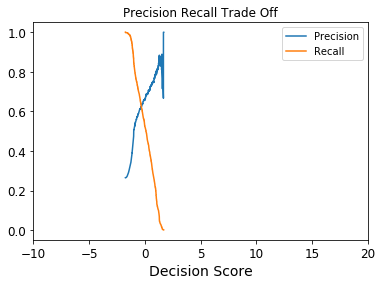

In [41]:
sm=SMOTE(sampling_strategy=0.4)
Xtrm,ytrm=sm.fit_sample(Xtr,ytr)
clfsm=SVC()
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION METRICS\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))
y_pred_decision = clfsm.decision_function(Xtr)
precisions, recalls, thresholds = precision_recall_curve(ytr,y_pred_decision)
#Precision-Recall Trade-off
plt.plot(thresholds,precisions[:-1],label='Precision')
plt.plot(thresholds,recalls[:-1],label='Recall')
plt.xlabel("Decision Score")
plt.title('Precision Recall Trade Off')
plt.legend()
plt.xlim([-10,20])
plt.show()

In [42]:
clfsm=RandomForestClassifier(n_estimators=400)
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION METRICS\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))

CONFUSION METRICS
 [[935 189]
 [113 182]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1124
           1       0.49      0.62      0.55       295

   micro avg       0.79      0.79      0.79      1419
   macro avg       0.69      0.72      0.70      1419
weighted avg       0.81      0.79      0.80      1419

ACCURACY SCORE 0.787174066244


In [43]:
sm=SMOTE(sampling_strategy=0.5)
Xtrm,ytrm=sm.fit_sample(Xtr,ytr)
clfsm=KNeighborsClassifier()
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION MATRIX\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))

CONFUSION MATRIX
 [[842 154]
 [206 217]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       996
           1       0.58      0.51      0.55       423

   micro avg       0.75      0.75      0.75      1419
   macro avg       0.69      0.68      0.69      1419
weighted avg       0.74      0.75      0.74      1419

ACCURACY SCORE 0.746300211416


CONFUSION MATRIX
 [[912 146]
 [136 225]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1058
           1       0.61      0.62      0.61       361

   micro avg       0.80      0.80      0.80      1419
   macro avg       0.74      0.74      0.74      1419
weighted avg       0.80      0.80      0.80      1419

ACCURACY SCORE 0.801268498943


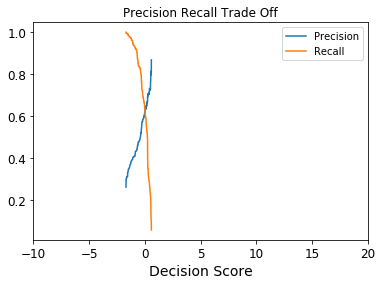

In [44]:
sm=SMOTE(sampling_strategy=0.65)
Xtrm,ytrm=sm.fit_sample(Xtr,ytr)
clfsm=GradientBoostingClassifier(learning_rate=0.01)
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION MATRIX\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))
y_pred_decision = clfsm.decision_function(Xtr)
precisions, recalls, thresholds = precision_recall_curve(ytr,y_pred_decision)
#Precision-Recall Trade-off
plt.plot(thresholds,precisions[:-1],label='Precision')
plt.plot(thresholds,recalls[:-1],label='Recall')
plt.xlabel("Decision Score")
plt.title('Precision Recall Trade Off')
plt.legend()
plt.xlim([-10,20])
plt.show()

CONFUSION MATRIX
 [[912 147]
 [136 224]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1059
           1       0.60      0.62      0.61       360

   micro avg       0.80      0.80      0.80      1419
   macro avg       0.74      0.74      0.74      1419
weighted avg       0.80      0.80      0.80      1419

ACCURACY SCORE 0.800563777308


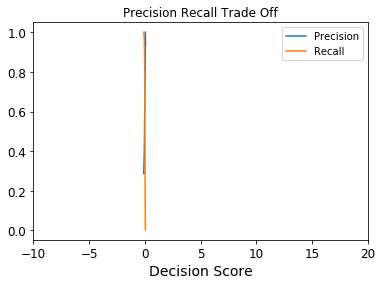

In [45]:
sm=SMOTE(sampling_strategy=0.5)
Xtrm,ytrm=sm.fit_sample(Xtr,ytr)
clfsm=AdaBoostClassifier()
clfsm.fit(Xtrm,ytrm)
pred=clfsm.predict(Xte)
print("CONFUSION MATRIX\n",confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",classification_report(pred,yte))
print("ACCURACY SCORE",accuracy_score(pred,yte))
y_pred_decision = clfsm.decision_function(Xtr)
precisions, recalls, thresholds = precision_recall_curve(ytr,y_pred_decision)
#Precision-Recall Trade-off
plt.plot(thresholds,precisions[:-1],label='Precision')
plt.plot(thresholds,recalls[:-1],label='Recall')
plt.xlabel("Decision Score")
plt.title('Precision Recall Trade Off')
plt.legend()
plt.xlim([-10,20])
plt.show()

In [46]:
test=pd.read_csv("churnte.csv")
test.drop(["gender"],axis=1,inplace=True)
test.drop(["Partner","PhoneService","MultipleLines"],axis=1,inplace=True)
test=changeall(test)
test=onehot(test)
clfsm.fit(X,y)
pred=clfsm.predict(test.drop("customerID",axis=1))
test["Churn"]=pred
data=test.loc[:,["customerID","Churn"]]
data.columns=["Id","Churn"]
data.to_csv("sub.csv",index=None)